In [17]:
# importing the necessary libraries
import pandas as pd
import numpy as np
#from imblearn.under_sampling import RandomUnderSampler

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Misc libraries
import warnings
warnings.filterwarnings("ignore")

In [40]:
# read the data
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [41]:
df=df[:100000]
df.shape

(100000, 11)

In [42]:
df['isFraud'].value_counts()

isFraud
0    99884
1      116
Name: count, dtype: int64

In [9]:
# checking the first 5 rows of the data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# checking the shape of the data
df.shape

(6362620, 11)

In [5]:
# checking the overall info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# checking for null values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# descriptive statistics of the data
df.describe().round(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6.362620e+06,6362620.00,6362620.0
mean,243.40,179861.90,833883.10,855113.67,1.100702e+06,1.224996e+06,0.00,0.0
std,142.33,603858.23,2888242.67,2924048.50,3.399180e+06,3.674129e+06,0.04,0.0
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
25%,156.00,13389.57,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
50%,239.00,74871.94,14208.00,0.00,1.327057e+05,2.146614e+05,0.00,0.0
75%,335.00,208721.48,107315.18,144258.41,9.430367e+05,1.111909e+06,0.00,0.0
max,743.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08,1.00,1.0


In [8]:
# checking type column categories
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
# storing the column ech categorie count 
type = df["type"].value_counts()

In [10]:
# getting the categories in type column
transaction = type.index

In [11]:
quantity = type.values
quantity

array([2237500, 2151495, 1399284,  532909,   41432])

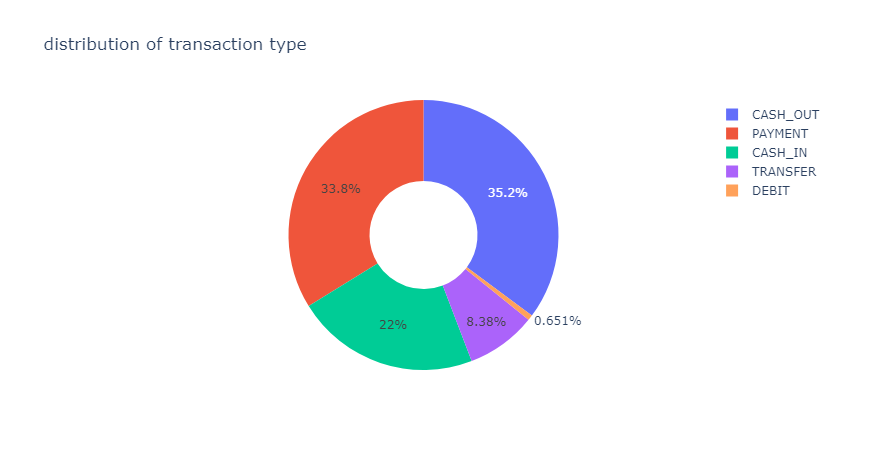

In [12]:
# visualizing the type column categories
px.pie(df, values = quantity, names = transaction,hole = 0.4,title = "distribution of transaction type")

In [10]:
# Count the number of occurrences of each value in the 'isFraud' column
fraud_counts = df['isFraud'].value_counts()

# Calculate the percentage of fraud and non-fraud cases
fraud_percentage = (fraud_counts[1] / len(df)) * 100
non_fraud_percentage = (fraud_counts[0] / len(df)) * 100

# Print the fraud and non-fraud percentages
print("Fraud percentage:", fraud_percentage)
print("Non-fraud percentage:", non_fraud_percentage)

Fraud percentage: 0.116
Non-fraud percentage: 99.884


In [14]:
print('\n The types of fraudulent transactions are {}'.format(\
list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))

dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print ('\n The number of fraudulent TRANSFERs = {}'.\
       format(len(dfFraudTransfer)))

print ('\n The number of fraudulent CASH_OUTs = {}'.\
       format(len(dfFraudCashout)))


 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']

 The number of fraudulent TRANSFERs = 4097

 The number of fraudulent CASH_OUTs = 4116


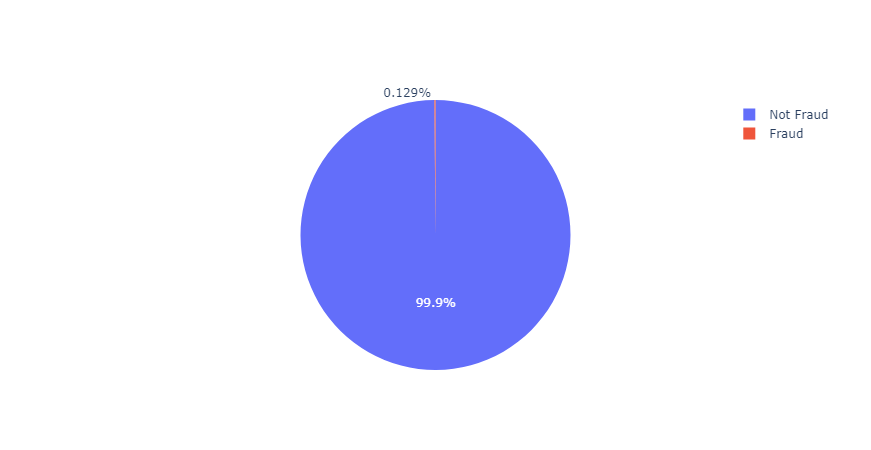

In [15]:
#Checking for balance in target
fig = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'], values=df['isFraud'].value_counts())])
fig.show()

In [21]:
# replacing string to integer values bassed the max occurance in the data
df.replace(to_replace = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], value = [2,4,1,5,3],inplace = True)

In [43]:
# taking the required columns for further analysis
X = df[['amount','oldbalanceOrg','newbalanceOrig']]
y = df[['isFraud']]

In [18]:
# Undersampling:
undersampler = RandomUnderSampler(random_state=42)
X_res, y_res = undersampler.fit_resample(x, y)

In [12]:
#Checking for balance in target
fig = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'], values=y_res['isFraud'].value_counts())])
fig.show()

NameError: name 'y_res' is not defined

In [44]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=111)

In [45]:
#Standardizing the numerical columns
col_names=['amount','oldbalanceOrg','newbalanceOrig']
features_train = X_train[col_names]
features_test = X_test[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_test = scaler.transform(features_test.values)
X_train[col_names] = features_train
X_test[col_names] =features_test

In [46]:
#creating the objects
#logreg_cv = LogisticRegression(solver='liblinear',random_state=123)
#dt_cv=DecisionTreeClassifier(random_state=123)
#knn_cv=KNeighborsClassifier()
#svc_cv=SVC(kernel='linear',random_state=123)
#nb_cv=GaussianNB()
rf=LogisticRegression(random_state=123)

In [47]:
rf.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [48]:
# Evaluate the best model on the test data
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.9988666666666667


In [28]:
#Classification metrics
print(classification_report(y_test, y_pred, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     29965
       Fraud       0.80      0.34      0.48        35

    accuracy                           1.00     30000
   macro avg       0.90      0.67      0.74     30000
weighted avg       1.00      1.00      1.00     30000



In [29]:
import pickle
with open("fraud.pkl", "wb") as f:
    pickle.dump(grid_search, f)

NameError: name 'grid_search' is not defined

In [49]:
import pickle

# Assuming 'best_rf' contains your trained RandomForestClassifier model

# Define the file path where you want to save the model
model_file_path = "orest.pkl"

# Save the model to the file path
with open(model_file_path, 'wb') as file:
    pickle.dump(rf, file)

print("Model saved successfully at:", model_file_path)

Model saved successfully at: orest.pkl
